<a href="https://colab.research.google.com/github/maddisurekha1234/Dental_Informatics_Project/blob/main/Authors_Collaboration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Auhor analysis and ranking the author based on the total number of articles written. keep it
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Author_Information.csv")
df['authorId'] = df['authorId'].fillna(0).astype(int)
df['count'] = df.groupby('name')['name'].transform('count')
df.drop_duplicates('name', inplace=True)
#df.nlargest(5, ['count'])[["name","authorId","count"]]
df1 = df.sort_values('count',ascending=False)
df1["Rank"] = df1["count"].rank(ascending=0)
df1 = df1.dropna(subset=['Rank'])
header = ["name", "authorId", "Rank"]
df1.to_csv('author_distribution.csv', columns = header)
plotgraph = pd.read_csv("author_distribution.csv")
plotgraph = df.nlargest(20, ['count'])[["name","count"]]
rank=pd.read_csv("author_distribution.csv")
top10rank = rank.head(20)
plotgraph['Rank'] = top10rank['Rank'].values
plotgraph

,name,count,Rank
29,T. Schleyer,14,1.0
23,E. Kalenderian,9,2.0
11,M. Walji,8,3.5
24,T. Thyvalikakath,8,3.5
40,A. Acharya,7,5.0
54,H. Spallek,6,6.5
55,Joel M. White,6,6.5
132,R. Ramoni,5,8.0
12,A. Yansane,4,10.0
39,Mei Song,4,10.0


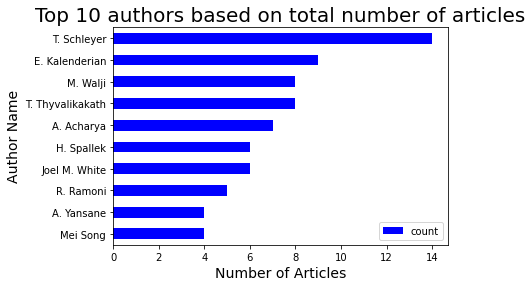

,name,count
29,T. Schleyer,14
23,E. Kalenderian,9
11,M. Walji,8
24,T. Thyvalikakath,8
40,A. Acharya,7
54,H. Spallek,6
55,Joel M. White,6
132,R. Ramoni,5
12,A. Yansane,4
39,Mei Song,4


In [8]:
#Plotting a graph for top 10 authors with the maximum number of articles published.
plotgraph.set_index("name",drop=True,inplace=True)
ax=plotgraph.plot.barh(color = 'Blue')
ax.invert_yaxis()
plt.title("Top 10 authors based on total number of articles",fontsize=20)
plt.xlabel("Number of Articles",fontsize=14)
plt.ylabel("Author Name",fontsize=14)
plt.show()
plotgraph = df.nlargest(10, ['count'])[["name","count"]]
plotgraph

In [ ]:
# Dental paper  refereneces per year keep it
import numpy as np
ref=pd.read_csv("Reference_Information.csv")
df1 = ref.replace(np.nan, '', regex=True)
df1.loc[df1['Reference _paper_venue'].str.contains('dental',na=False), 'venue'] = 'Journal of dental education'
df2 = df1.loc[df1['Reference _paper_venue'] == 'Journal of dental education']
refer_per_year = pd.DataFrame(df2['Reference _paper_year'].value_counts()).reset_index()
refer_per_year.columns = ['Year', 'Refereneces_Per_year']
sortref_by_year = refer_per_year.sort_values('Year')
sortref_by_year

,Year,Refereneces_Per_year
22,1976.0,1
25,1989.0,1
19,1995.0,2
5,1996.0,8
12,1997.0,5
13,1998.0,4
23,2000.0,1
10,2001.0,5
9,2002.0,6
2,2003.0,11


In [ ]:
#Journal of dental research Citations per year
import numpy as np
cit=pd.read_csv("Citation_Information.csv")
cit1 = cit.replace(np.nan, '', regex=True)
cit1.loc[cit1['venue'].str.contains('dental',na=False), 'venue'] = 'Journal of the American Dental Association'
cit2 = cit1.loc[cit1['venue'] == 'Journal of the American Dental Association']
cit_per_year = pd.DataFrame(cit2['year'].value_counts()).reset_index()
cit_per_year.columns = ['Year', 'Citations_Per_Year']
sortcit_by_year = cit_per_year.sort_values('Year')
sortcit_by_year

,Year,Citations_Per_Year
16,2003.0,5
17,2005.0,1
15,2006.0,5
14,2007.0,8
13,2008.0,25
10,2009.0,82
9,2010.0,111
11,2011.0,78
0,2012.0,323
1,2013.0,203


In [ ]:
#Comparision of citations and Refereneces each year kkep it
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Referencesperyear', x=sortref_by_year['Year'], y=sortref_by_year['Refereneces_Per_year']),
    go.Bar(name='citationsperyear', x=sortcit_by_year['Year'], y=sortcit_by_year['Citations_Per_Year'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

In [ ]:
#Reading the author table for data analysis keep it
import pandas as pd
coauthordf = pd.read_csv("Author_Information.csv")
coauthordf['authorId'] = coauthordf['authorId'].fillna(0).astype(int)
coauthordf

,Unnamed: 0,article_id,authorId,name,url,Rank
0,0,10.1111/jphd.12354,145954113,J. Finkelstein,https://www.semanticscholar.org/author/145954113,1
1,1,10.1111/jphd.12354,2109244698,Frederick Zhang,https://www.semanticscholar.org/author/2109244698,2
2,2,10.1111/jphd.12354,46572684,S. Levitin,https://www.semanticscholar.org/author/46572684,3
3,3,10.1111/jphd.12354,5896960,D. Cappelli,https://www.semanticscholar.org/author/5896960,4
4,4,10.2196/18652,13045722,Ye-hui Lin,https://www.semanticscholar.org/author/13045722,1
...,...,...,...,...,...,...
396,396,10.1177/154407370301700104,2169003,T. Schleyer,https://www.semanticscholar.org/author/2169003,1
397,397,10.1177/154407370301700103,2169003,T. Schleyer,https://www.semanticscholar.org/author/2169003,1
398,398,10.1177/154407370301700105,1690314,Dean F. Sittig,https://www.semanticscholar.org/author/1690314,1
399,399,10.1177/154407370301700105,2266623,M. Kirshner,https://www.semanticscholar.org/author/2266623,2


In [ ]:
#Authors and co authors for all the articles. keep it
import numpy as np
group = coauthordf.groupby('article_id')
df2 = group.apply(lambda x: x['name'].unique())
df2 = df2.apply(pd.Series)
df2 = df2.replace(np.nan, '', regex=True)
df2.to_csv("AuthorCollaboration.csv")
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1002/J.0022-0337.2005.69.3.TB03927.X,L. Rajab,Z. Baqain,,,,,,,,,,,,,,,,,,,,,,,,
10.1002/J.0022-0337.2011.75.5.TB05086.X,Joel M. White,E. Kalenderian,P. Stark,Rachel L Ramoni,R. Vaderhobli,M. Walji,,,,,,,,,,,,,,,,,,,,
10.1002/J.0022-0337.2012.76.1.TB05241.X,T. Schleyer,T. Thyvalikakath,H. Spallek,Michael P. Dziabiak,L. Johnson,,,,,,,,,,,,,,,,,,,,,
10.1007/978-3-319-17272-9_9,E. Kalenderian,M. Walji,R. Ramoni,,,,,,,,,,,,,,,,,,,,,,,
10.1007/978-3-319-98298-4_11,M. Torres-Urquidy,V. J. H. Powell,S. Geist,Sushma Mishra,Monica Chaudhari,Mureen Allen,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.4338/ACI-2015-11-RA-0150,K. Schwei,R. Cooper,Andrea Mahnke,Zhan Ye,A. Acharya,,,,,,,,,,,,,,,,,,,,,
10.5210/ojphi.v11i2.10131,S. Swanik,,,,,,,,,,,,,,,,,,,,,,,,,
10.5455/aim.2012.20.47-55,Fedja Masic,,,,,,,,,,,,,,,,,,,,,,,,,
